In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import xmltodict

# W = 5


Расчет начинается. Nup = 3, потому что до этого линии "как бы пересекаются, см.историю в тг-чате".

In [2]:
df = pd.read_excel('W5_points.xlsx')

In [3]:
# mu = -h + e(1,0)
# mu = e(1,1)/2
e11 = df[(df.Ndown_total==1) & (df.Nup_total==1)].E.values[0]


# В файлике точки 1, 0 не было - посчитал отдельно 
e10 = -3.726182409933958
def diagon(x):
    return -x + e10

In [4]:
# Пересечение 

h_w_5 = e10 - e11/2
mu_w_5 = e11/2

In [5]:
# df.sort_values(by = ['Nup_total', 'Ndown_total'])

In [6]:
l = list(range(3, 14))

In [7]:
mu_w5_1, h_w5_1 = [mu_w_5], [h_w_5]
for i in l:
    mu = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==1)]['E'].values[0] -
          df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0]) / 2
    h = (df[(df['Nup_total']==i-1) & (df['Ndown_total']==1)]['E'].values[0] -
         df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0]) / (-2)
    mu_w5_1.append(mu)
    h_w5_1.append(h)

In [8]:
df2_list = list(range(3, 14))

In [9]:
mu_w5_2, h_w5_2 = [mu_w_5], [h_w_5]

for i in df2_list:
    mu = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i+1)]['E'].values[0] -
          df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0]) / 2
    h = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i-1)]['E'].values[0] -
         df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0]) / 2
    mu_w5_2.append(mu)
    h_w5_2.append(h)

In [10]:
e11_w5 = df[(df['Nup_total']==1) & (df['Ndown_total']==1)]['E'].values[0]
e10_w5 = df[(df['Nup_total']==1) & (df['Ndown_total']==0)]['E'].values[0]

In [11]:
(h_w5_1[0], mu_w5_1[0]), (h_w5_2[0], mu_w5_2[0])

((0.9103777965173596, -4.636560206451318),
 (0.9103777965173596, -4.636560206451318))

<IPython.core.display.Javascript object>


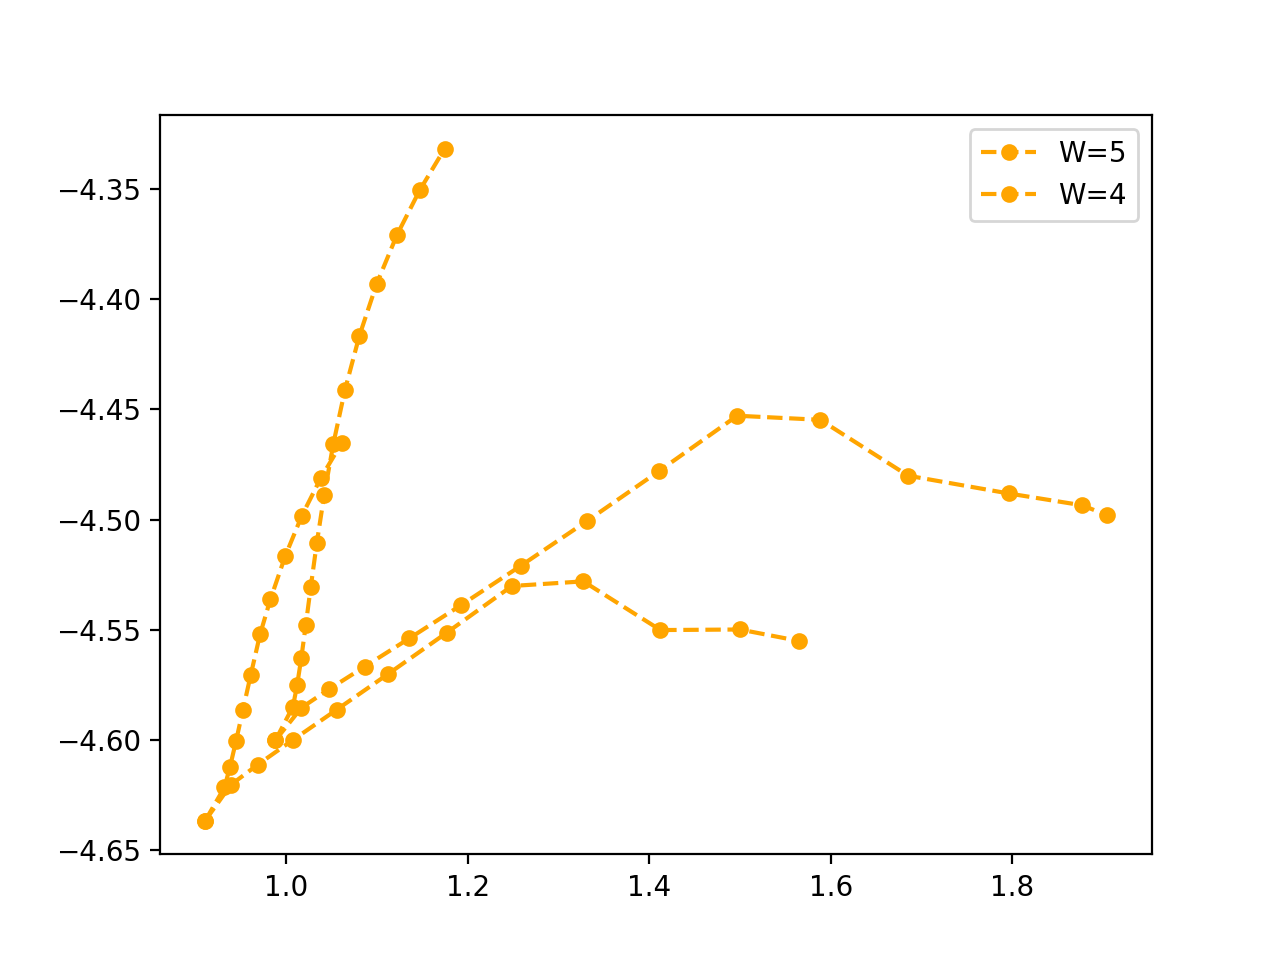

In [12]:
%matplotlib notebook
plt.plot(h_w5_1, mu_w5_1, 'o--', label='W=5', color='orange', markersize=5)
plt.plot(h_w5_2, mu_w5_2, 'o--', color='orange', markersize=5)
plt.legend()

# W = 4

In [13]:
df = pd.read_excel('w4-40-polaron-v3.xlsx')
df2 = pd.read_excel('w4-40-equal-v4.xlsx')

In [14]:
df2.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('eq', axis = 1, inplace = True)

In [15]:
df2 = pd.concat([df,df2])

In [16]:
e11_w4 = df2[(df2['Nup_total']==1) & (df2['Ndown_total']==1)]['E'].values[0]
e10_w4 = df2[(df2['Nup_total']==159) & (df2['Ndown_total']==0)]['E'].values[0]

# Пересечение 

h_w_4 = e10_w4 - e11_w4/2
mu_w_4 = e11_w4/2

In [17]:
l = list(range(3,30))+list(range(30,100,5))+list(range(105,156,5))+[159]

In [18]:
mu_w4_1, h_w4_1 = [mu_w_4], [h_w_4]
for i in l:
    mu = (df2[(df2['Nup_total']==i+1) & (df2['Ndown_total']==1)]['E'].values[0] - df2[(df2['Nup_total']==i) & (df2['Ndown_total']==0)]['E'].values[0])/2
    h = (df2[(df2['Nup_total']==i-1) & (df2['Ndown_total']==1)]['E'].values[0] - df2[(df2['Nup_total']==i) & (df2['Ndown_total']==0)]['E'].values[0])/-2
    mu_w4_1.append(mu)
    h_w4_1.append(h)

In [19]:
df2_list = list(range(3,30))+list(range(30,81,5))

In [20]:
mu_w4_2, h_w4_2 = [mu_w_4], [h_w_4]
for i in df2_list:
    mu = (df2[(df2['Nup_total']==i+1) & (df2['Ndown_total']==i+1)]['E'].values[0] - df2[(df2['Nup_total']==i) & (df2['Ndown_total']==i)]['E'].values[0])/2
    h = (df2[(df2['Nup_total']==i+1) & (df2['Ndown_total']==i-1)]['E'].values[0] - df2[(df2['Nup_total']==i) & (df2['Ndown_total']==i)]['E'].values[0])/2
    mu_w4_2.append(mu)
    h_w4_2.append(h)

In [21]:
e11_w4 = df[(df['Nup_total']==1) & (df['Ndown_total']==1)]['E'].values[0]
e10_w4 = df[(df['Nup_total']==159) & (df['Ndown_total']==0)]['E'].values[0]

def mu(h):
    return -h +e10

def mu3(h):
    return -h - e10

h = np.arange(h_w4_1[0], 10, 0.1)
h3 = np.arange(6.5, 10, 0.1)

In [22]:
plt.plot(h_w4_1[:15], mu_w4_1[:15], 'o--', label='W=4', color='orange', markersize=5)
plt.plot(h_w4_2[:15], mu_w4_2[:15], 'o--', color='orange', markersize=5)
plt.legend()

# W = 2

In [23]:
import os
import re

## Тут должен отображаться путь до директории с репой diagrams2 включительно

Например у меня это 

    '/Users/i.pile/Documents/GitHub/diagrams2'

In [24]:
dir_path = re.split(r'(?<=diagrams2)/', os.getcwd())[0]
dir_path

'/Users/i.pile/Documents/GitHub/diagrams2'

In [25]:
def En(j, n, m):
    Energy = [] 
    path = "../w2/t-1/"  
    for i in range(n, m, 2):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
    return Energy

def En1(j, n, m):
    Energy = [] 
    path = "../w2/t-1/"
    for i in range(n, m, 4):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
        j = j + 4
    return Energy

In [26]:
#E(N, 0) : (2, 0), (4, 0), ... (78, 0)
e1 = En(0, 2, 79)

#E(N+1, 1) : (3, 1), (5, 1), ... (79, 1)
e2 = En(1, 3, 80)

#E(N-1, 1) : (1, 1), (3, 1), ... (77, 1)
e3 = En(1, 1, 78)

#E(N, N) : (1, 1), (5, 5), ... (37, 37), (39, 39)
e4 = En1(1, 1, 38)

#E(N+1, N+1) : (2, 2), (6, 6), ... (38, 38), (40 40)
e5 = En1(2, 2, 39)

#E(N+1, N-1) : (2, 0), (6, 4), ... (38, 36), (40 38)
e6 = En1(0, 2, 39)

e4.append(En(39, 39, 40)[0])
e5.append(En(40, 40, 41)[0])
e6.append(En(38, 40, 41)[0])

h_w2_1 = []
mu_w2_1 = []
for x in range(len(e1)):
    h_w2_1.append((e3[x] - e1[x]) / -2)
    mu_w2_1.append((e2[x] - e1[x]) / 2)

h_w2_2 = []
mu_w2_2 = []
for x in range(len(e4)):
    h_w2_2.append((e6[x] - e4[x]) / 2)
    mu_w2_2.append((e5[x] - e4[x]) / 2)

e10_w2 = En(0, 1, 2)[0]

h2_w2 = np.arange(h_w2_1[0], 2.7, 0.1)

def mu2(h):
    return - h + e10_w2

h3_w2 = np.arange(5.3, 8, 0.2)
def mu3(h):
    return -h - e10_w2

In [27]:
e11_w2 = e4[0]

In [28]:
# Пересечение 

h_w_2 = e10_w2 - e11_w2/2
mu_w_2 = e11_w2/2

In [29]:
h_w2_1 = [h_w_2] + h_w2_1[1:]
mu_w2_1 = [mu_w_2] + mu_w2_1[1:]
h_w2_2 = [h_w_2] + h_w2_2[1:]
mu_w2_2 = [mu_w_2] + mu_w2_2[1:]

<IPython.core.display.Javascript object>


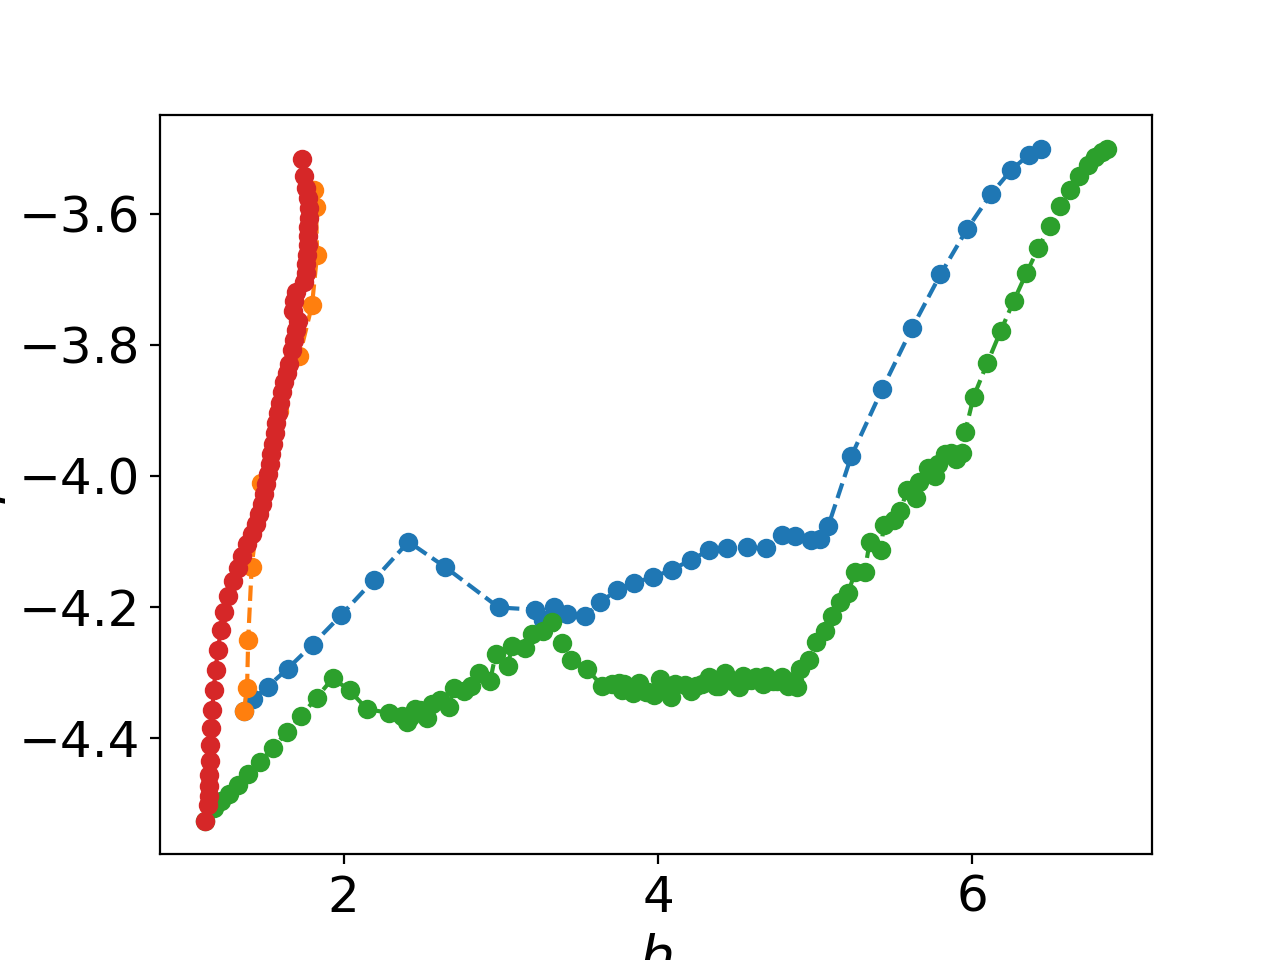

Text(0, 0.5, '$\\mu$')

In [30]:
%matplotlib notebook

plt.plot(h_w2_1, mu_w2_1, 'o--', label='$PP-{FP_1}$')
plt.plot(h_w2_2, mu_w2_2, 'o--', label='$ED-PP$')
# plt.plot(h2_w2, mu2(h2_w2), '-', label='$V-{FP_1}$')
# plt.plot(h3_w2, mu3(h3_w2), '-', label='${FP_1}-{FP_2}$')
# plt.axhline(y=(e4[0]/2), color='purple', xmax=(h_w2_1[0]/xscale),label='$ED-V$')
# plt.axvline(x=h_w2_1[0],linestyle='--', color='grey')
plt.xlabel('$h$', size=20)
plt.ylabel('$\mu$', size=20)

# W = 3

In [31]:
def En(j, n, m, folder='', k = 0):
    Energy = [] 
    path = "../w3/t-1/" + folder
    for i in range(n, m):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
        j = j + k
    return Energy

def En1(j, n, m, folder=''):
    Energy = [] 
    path = "../w3/t-1/" + folder
    for i in range(n, m):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
        j = j + 1
    return Energy

In [32]:
enn = En1(1, 1, 61, 'ED-PP/')
enn1 = En1(0, 2, 61, 'ED-PP/')

In [33]:
#E(N, 0) : (2, 0), (3, 0), ... (118, 0)

#E(N+1, 1) : (3, 1), (4, 1), ... (119, 1)

#E(N-1, 1) : (1, 1), (3, 1), ... (117, 1)

en0_w3 = En(0, 1, 119)
en1_w3 = En(1, 1, 120)
h_w3_1 = []
mu_w3_1 = []
for x in range(1, 118):
    h_w3_1.append((en1_w3[x - 1] - en0_w3[x]) / -2)
    mu_w3_1.append((en1_w3[x + 1] - en0_w3[x]) / 2)

h_w3_2 = []
mu_w3_2 = []
for x in range(1, 59):
    h_w3_2.append((enn1[x] - enn[x]) / 2)
    mu_w3_2.append((enn[x + 1] - enn[x]) / 2)

In [34]:
e10_w3 = en0_w3[0]
e11_w3 = en1_w3[0]
h_w_3 = e10_w3 - e11_w3/2
mu_w_3 = e11_w3/2

In [35]:
h_w_3, mu_w_3

(1.118525107693868, -4.526870272434443)

In [36]:
e10_w3 = en0_w3[0]
e11_w3 = en1_w3[0]

h2 = np.arange(h_w3_1[0], 2.7, 0.1)
def mu2(h):
    return - h + e10_w3

h3 = np.arange(5.3, 9, 0.2)
def mu3(h):
    return -h - e10_w3

In [37]:
h_w3_1 = [h_w_3] + h_w3_1[2:]
mu_w3_1 = [mu_w_3] + mu_w3_1[2:]
h_w3_2 = [h_w_3] + h_w3_2[2:]
mu_w3_2 = [mu_w_3] + mu_w3_2[2:]

In [38]:
# plt.figure(figsize=(7, 5))
# xscale = 8

plt.plot(h_w3_1, mu_w3_1, 'o--', label='$PP-{FP_1}$')
plt.plot(h_w3_2, mu_w3_2, 'o--', label='$ED-PP$')
plt.xlabel('$h$', size=20)
plt.ylabel('$\mu$', size=20)
plt.tick_params(axis='both', which='major', labelsize=18)

# W = 1

In [100]:
import re

In [101]:
lst = []
with open('W1_40_energies.txt') as f:
    for line in f:
#         print(line)
        nup, ndown, e = re.findall(r'(?<== )[\d\.-]+', line)
        lst.append({'Nup':nup, 'Ndown':ndown, 'E':e})
#         {'Nup': }
#         break
df = pd.DataFrame(lst)

In [102]:
df.drop_duplicates(inplace = True)

In [103]:
import numpy as np

In [104]:
float(df.E.loc[0])

-1.994131602365326

In [105]:
df['Nup'] = df.Nup.astype(int)
df['Ndown'] = df.Ndown.astype(int)
df['E'] = df.E.astype(np.float64)

In [106]:
df[(df['Nup']==1) & (df['Ndown']==1)]

,Nup,Ndown,E
1,1,1,-8.060717


In [107]:
e11_w1 = df[(df['Nup']==1) & (df['Ndown']==1)]['E'].values[0]
e10_w1 = df[(df['Nup']==1) & (df['Ndown']==0)]['E'].values[0]

# Пересечение 

h_w_1 = e10_w1 - e11_w1/2
mu_w_1 = e11_w1/2

In [108]:
h_w_1, mu_w_1

(2.0362266621815293, -4.030358264546855)

In [109]:
l = list(range(2, 39))

In [110]:
mu_1_1, h_1_1 = [mu_w_1], [h_w_1]
for i in l:
    mu = (df[(df['Nup']==i+1) & (df['Ndown']==1)]['E'].values[0] - df[(df['Nup']==i) & (df['Ndown']==0)]['E'].values[0])/2
    h = (df[(df['Nup']==i-1) & (df['Ndown']==1)]['E'].values[0] - df[(df['Nup']==i) & (df['Ndown']==0)]['E'].values[0])/-2
    mu_1_1.append(mu)
    h_1_1.append(h)

In [111]:
mu_1_2, h_1_2 = [mu_w_1], [h_w_1]
for i in l:
    mu = (df[(df['Nup']==i+1) & (df['Ndown']==i+1)]['E'].values[0] - df[(df['Nup']==i) & (df['Ndown']==i)]['E'].values[0])/2
    h = (df[(df['Nup']==i+1) & (df['Ndown']==i-1)]['E'].values[0] - df[(df['Nup']==i) & (df['Ndown']==i)]['E'].values[0])/2
    mu_1_2.append(mu)
    h_1_2.append(h)

## Данные в двух ячейках ниже – про L=80

In [112]:
# h_1_1 = [2.0346893462140208, 2.0342309070771565, 2.0333778245105165, 2.032152745672853, 2.030553695439444, 2.0285916222664113, 2.0262732859397445, 2.0236084633447007, 2.02060864419974, 2.0172871740860074, 2.0136589902684534, 2.0097413792702667, 2.005553434655276, 2.001116002375092, 1.996450387229764, 1.9915817014132386, 1.9865353758311954, 1.9813404363751204, 1.976023020213887, 1.9706158634651274, 1.965148984284852, 1.9596527997433668, 1.9541630848624294, 1.9487160155117351, 1.9433427454309538, 1.9380830802538611, 1.932963578209879, 1.928005728877153, 1.9233010869873794, 1.8951391360483854, 1.897260076704839, 1.9013605608148794, 1.9072251296850027, 1.914618098433607, 1.9232858607973924, 1.9329660036738971, 1.9433429321917117, 1.954159487914211]
# mu_1_1 = [-4.030349137669491, -4.029337262251429, -4.027888364111307, -4.02596613391346, -4.023554742041107, -4.0206290340478255, -4.017162946405133, -4.013131923104048, -4.0085110434015405, -4.00327481808926, -3.9973986490291225, -3.990857915490672, -3.9836285680904524, -3.9756872367116003, -3.967011436387459, -3.9575797635882566, -3.9473720672111625, -3.9363696971872173, -3.924555663104073, -3.911914897061152, -3.89843439303975, -3.8841034673211965, -3.868913816243733, -3.852859863321271, -3.835938685832275, -3.8181503675841526, -3.7994978806551956, -3.7799872522337523, -3.7596276636383834, -3.4590145292740715, -3.405304550885063, -3.3543810919298096, -3.306408966471764, -3.2615687845659806, -3.2200127493110244, -3.1818496311724402, -3.147140139260472, -3.115896533738862]

In [113]:
# h_1_2 = [2.0346951290444952, 2.0406715532905118, 2.0495795595011166, 2.0613312240369845, 2.0759051926535088, 2.0932376317595729, 2.1132710311356426, 2.1359028825121928, 2.161082228090601, 2.1887377048764716, 2.2188122956631808, 2.2511996357790718, 2.2858246165714853, 2.3226155904725996, 2.3614954182691044, 2.4024277232740356, 2.4452053274833858, 2.4899350590535008, 2.5363332435195076, 2.5843112353782445, 2.6341878550963962, 2.6853032735182367, 2.7381943401407476, 2.7922385899236346, 2.8475256396348385, 2.9041280028021852, 2.9617745082875011, 3.0204658810786071, 3.0800201777560936, 3.1406590162813188, 3.2019774385524649, 3.2639870858906406, 3.3266427859256389, 3.3898063176604758, 3.4533109258303085, 3.5174974134488508, 3.5818772673697268, 3.6464117947783947, 3.7110608355943384, 3.7758490743302104, 3.8405821759578096, 3.9051639824088902, 3.9696163634067396, 4.0337527138408156, 4.0975462939258556, 4.1609449473776046, 4.2238038791409416, 4.2860399256675947, 4.347650132928532, 4.4084847856924476, 4.4684901303798128, 4.5275828438861119, 4.5856806126261525, 4.642691019061818, 4.6985747778349101, 4.7532191461351978, 4.8065465487356676, 4.858493930393422, 4.9089814321609886, 4.9579357119384255, 5.0052672724653213, 5.0508767776485435, 5.0947588789772293, 5.1367675148285912, 5.1768576681585863, 5.2149464393399292, 5.2509740756013592, 5.2848292932717751, 5.3164733628282743, 5.3458434056306956]
# mu_1_2 = [-4.0308033686529292, -4.0305680115550535, -4.0302171179180348, -4.0296655138519206, -4.0289142086163663, -4.0278342947430126, -4.0265255183239379, -4.0248465799591724, -4.0228499253663053, -4.0203399171104977, -4.0175777844545841, -4.0142859717765003, -4.0105352999447277, -4.0063550291569197, -4.0016615963250786, -3.9964618428851804, -3.9908192860569294, -3.9846124251711892, -3.9779762231941724, -3.9708097334906327, -3.9631532196504757, -3.9550334599980879, -3.9461992171274645, -3.9373603178044689, -3.9278230519105293, -3.9178954664523395, -3.907554857353265, -3.896896825150872, -3.8858598153589341, -3.8744940724056534, -3.8628325198380118, -3.8509208485743756, -3.8388106373027711, -3.8264720770400942, -3.8140288307815737, -3.8013531346267122, -3.7885969962779384, -3.7757681867155704, -3.7630531709369635, -3.7502427995233631, -3.7374489753960134, -3.7247676787458914, -3.7122248570684597, -3.6997866336277809, -3.6875541857529193, -3.6755170337042919, -3.6637379583252887, -3.6522285701546835, -3.64102882628492, -3.6301502218905384, -3.619631403347217, -3.6094935249358926, -3.599767549838333, -3.5904575863286183, -3.5815719557555177, -3.5731708100147657, -3.5652103454264648, -3.5577365603783875, -3.5507840727617861, -3.5442970875028657, -3.5382984503069643, -3.5328226741134614, -3.5278177864829221, -3.5232894514698394, -3.5192100435038647, -3.5156465540248565, -3.5125018260793333, -3.5097753763892605, -3.5074580498172327, -3.5055155281766126]

In [114]:
h11 = np.arange(h_1_2[0], 2.7, 0.1)
def mu1(h):
    return -h - 2
h33 = np.arange(5.3, 7, 0.2)
def mu3(h):
    return -h + 2

In [115]:
# Check the exact formulas for E(1, 1) (hence (\mu_o, h_o) for W=1

U, t = 7, 1
mu_o = -np.sqrt(U**2 + (4*t)**2) / 2
h_o = -mu_o - 2*t

mu_o, h_o

(-4.031128874149275, 2.0311288741492746)

<IPython.core.display.Javascript object>


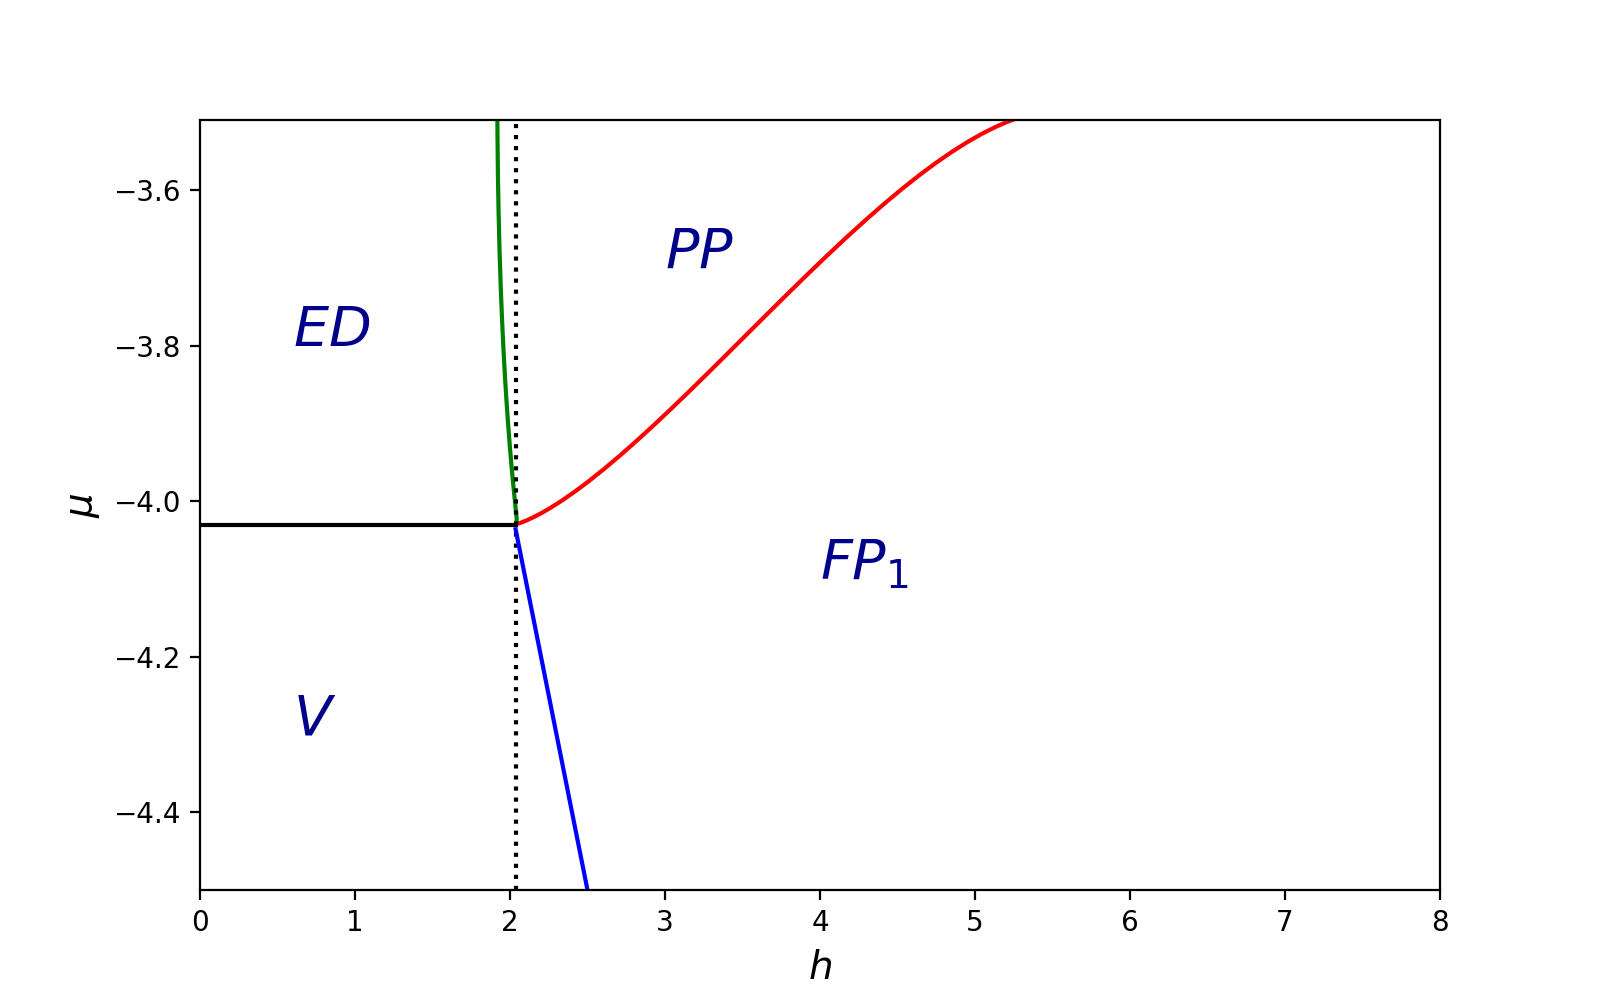

Text(0, 0.5, '$\\mu$')

In [116]:
xscale = 8
plt.figure(figsize=(8, 5))
plt.plot(h_1_1, mu_1_1, '-', color = 'red')
plt.plot(h_1_2, mu_1_2, '-', color = 'green')
plt.axis([0, xscale, -4.5, -3.51])
plt.axhline(y=mu_1_1[0], color='black', xmax=(h_1_2[0]/xscale))
plt.axvline(x=h_1_2[0], linestyle=':', color='black')
plt.plot(h11, mu1(h11), '-', color = 'blue')
plt.xlabel('h')
plt.ylabel('mu')
plt.text(0.6, -3.8, '$ED$', fontsize=20, color='darkblue')
plt.text(0.6, -4.3, '$V$', fontsize=20, color='darkblue')
plt.text(3, -3.7, '$PP$', fontsize=20, color='darkblue')
plt.text(4, -4.1, '$FP_1$', fontsize=20, color='darkblue')
plt.show()

plt.xlabel('$h$', size=14)
plt.ylabel('$\mu$', size=14)

In [117]:
plt.plot(h_w1_1, new_mu_w1_1, 'o--', label='W=1', color='black', lw=1, markersize=5)
plt.plot(new_h_w1_2, new_mu_w1_2, 'o--', color='black', lw=1, markersize=5)

#plt.plot(h_w2_1, mu_w2_1, 'o--', label='W=2', color='blue', lw=1, markersize=5)
#plt.plot(h_w2_2, mu_w2_2, 'o--', color='blue', lw=1, markersize=5)

NameError: name 'new_mu_w1_1' is not defined

# Совместим все точки в точку от W = 2

In [66]:
delta_mu_w3 = mu_w_2 - mu_w_3
delta_h_w3 = h_w_2 - h_w_3

delta_mu_w4 = mu_w_2 - mu_w_4
delta_h_w4 = h_w_2 - h_w_4

delta_mu_w5 = mu_w_2 - mu_w_5
delta_h_w5 = h_w_2 - h_w_5

delta_mu_w1 = mu_w_2 - mu_1_1[0]
delta_h_w1 = h_w_2 - h_1_1[0]

#delta_mu_w3 = delta_h_w3 = delta_mu_w4 = delta_h_w4 = delta_mu_w5 = delta_h_w5 = delta_mu_w1 = delta_h_w1 = 0

# Подкрутим W=3, W=4 и W = 5

In [67]:
new_h_w1_1 = [i + delta_h_w1 for i in h_1_1 if i is not None]
new_h_w1_2 = [i+delta_h_w1 for i in h_1_2 if i is not None]

new_mu_w1_1 = [i+delta_mu_w1 for i in mu_1_1  if i is not None]
new_mu_w1_2 = [i+delta_mu_w1 for i in mu_1_2  if i is not None]

new_h_w3_1 = [i+delta_h_w3 for i in h_w3_1  if i is not None]
new_h_w3_2 = [i+delta_h_w3 for i in h_w3_2  if i is not None]

new_mu_w3_1 = [i+delta_mu_w3 for i in mu_w3_1  if i is not None]
new_mu_w3_2 = [i+delta_mu_w3 for i in mu_w3_2  if i is not None]


new_h_w4_1 = [i+delta_h_w4 for i in h_w4_1 if i is not None]
new_h_w4_2 = [i+delta_h_w4 for i in h_w4_2 if i is not None]

new_mu_w4_1 = [i+delta_mu_w4 for i in mu_w4_1 if i is not None]
new_mu_w4_2 = [i+delta_mu_w4 for i in mu_w4_2 if i is not None]

new_h_w5_1 = [i+delta_h_w5 for i in h_w5_1 if i is not None]
new_h_w5_2 = [i+delta_h_w5 for i in h_w5_2 if i is not None]

new_mu_w5_1 = [i+delta_mu_w5 for i in mu_w5_1 if i is not None]
new_mu_w5_2 = [i+delta_mu_w5 for i in mu_w5_2 if i is not None]

<IPython.core.display.Javascript object>


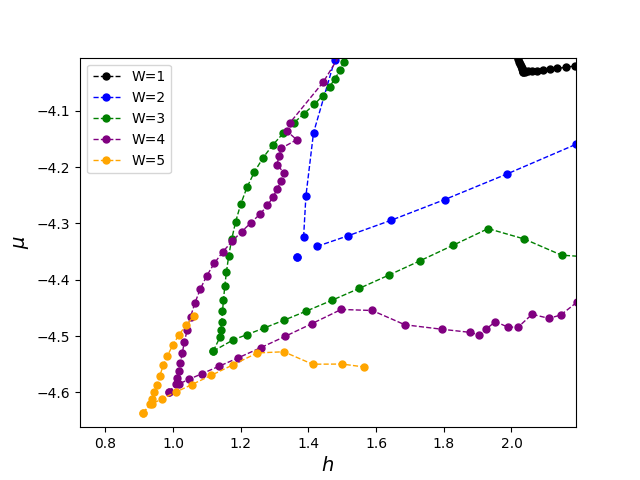

In [68]:
%matplotlib notebook
# plt.figure(figsize=(16, 10))
xscale = 9

plt.plot(new_h_w1_1, new_mu_w1_1, 'o--', label='W=1', color='black', lw=1, markersize=5)
plt.plot(new_h_w1_2, new_mu_w1_2, 'o--', color='black', lw=1, markersize=5)

plt.plot(h_w2_1, mu_w2_1, 'o--', label='W=2', color='blue', lw=1, markersize=5)
plt.plot(h_w2_2, mu_w2_2, 'o--', color='blue', lw=1, markersize=5)

plt.plot(new_h_w3_1, new_mu_w3_1, 'o--', label='W=3', color='green', lw=1, markersize=5)
plt.plot(new_h_w3_2, new_mu_w3_2, 'o--', color='green', lw=1, markersize=5)

plt.plot(new_h_w4_1, new_mu_w4_1, 'o--', label='W=4', color='purple', lw=1, markersize=5)
plt.plot(new_h_w4_2, new_mu_w4_2, 'o--', color='purple', lw=1, markersize=5)

plt.plot(new_h_w5_1, new_mu_w5_1, 'o--', label='W=5', color='orange', lw=1, markersize=5)
plt.plot(new_h_w5_2, new_mu_w5_2, 'o--', color='orange', lw=1, markersize=5)
plt.xlabel('$h$', size=14)
plt.ylabel('$\mu$', size=14)
plt.legend()

## Сместим все линии $(\mu_O, h_O) \to (0, 0)$

In [67]:
# W = 1
new_h_w1_1 = [i - h_o for i in h_1_1]
new_h_w1_2 = [i - h_o for i in h_1_2]

new_mu_w1_1 = [i - mu_o for i in mu_1_1]
new_mu_w1_2 = [i - mu_o for i in mu_1_2]


# W = 2
new_h_w2_1 = [i - h_w2_1[0] for i in h_w2_1]
new_h_w2_2 = [i - h_w2_2[0] for i in h_w2_2]

new_mu_w2_1 = [i - mu_w2_1[0] for i in mu_w2_1]
new_mu_w2_2 = [i - mu_w2_2[0] for i in mu_w2_2]


# W =3
new_h_w3_1 = [i - h_w3_1[0] for i in h_w3_1]
new_h_w3_2 = [i - h_w3_2[0] for i in h_w3_2]

new_mu_w3_1 = [i - mu_w3_1[0] for i in mu_w3_1]
new_mu_w3_2 = [i - mu_w3_2[0] for i in mu_w3_2]

# W = 4
new_h_w4_1 = [i - h_w4_1[0] for i in h_w4_1]
new_h_w4_2 = [i - h_w4_2[0] for i in h_w4_2]

new_mu_w4_1 = [i - mu_w4_1[0] for i in mu_w4_1]
new_mu_w4_2 = [i - mu_w4_2[0] for i in mu_w4_2]

# W = 5
new_h_w5_1 = [i - h_w5_1[0] for i in h_w5_1]
new_h_w5_2 = [i - h_w5_2[0] for i in h_w5_2]

new_mu_w5_1 = [i - mu_w5_1[0] for i in mu_w5_1]
new_mu_w5_2 = [i - mu_w5_2[0] for i in mu_w5_2]

<IPython.core.display.Javascript object>


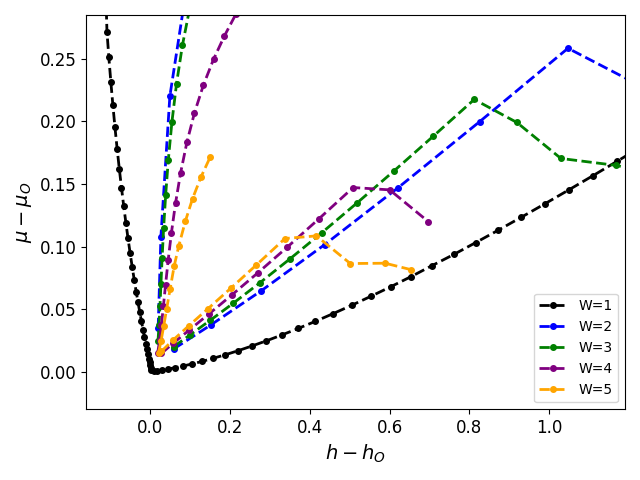

In [82]:
kwds = dict(ls='--', marker='o', lw=2, markersize=4)

plt.plot(new_h_w1_1[1:], new_mu_w1_1[1:], label='W=1', color='black', **kwds)
plt.plot(new_h_w1_2[1:], new_mu_w1_2[1:], color='black', **kwds)

plt.plot(new_h_w2_1[1:], new_mu_w2_1[1:], label='W=2', color='blue', **kwds)
plt.plot(new_h_w2_2[1:], new_mu_w2_2[1:], color='blue', **kwds)

plt.plot(new_h_w3_1[1:], new_mu_w3_1[1:], label='W=3', color='green', **kwds)
plt.plot(new_h_w3_2[1:], new_mu_w3_2[1:], color='green', **kwds)

plt.plot(new_h_w4_1[1:], new_mu_w4_1[1:], label='W=4', color='purple', **kwds)
plt.plot(new_h_w4_2[1:], new_mu_w4_2[1:], color='purple', **kwds)

plt.plot(new_h_w5_1[1:], new_mu_w5_1[1:], label='W=5', color='orange', **kwds)
plt.plot(new_h_w5_2[1:], new_mu_w5_2[1:], color='orange', **kwds)

plt.xlabel('$h - h_O$', size=14)
plt.ylabel('$\mu - \mu_O$', size=14)

plt.gca().xaxis.set_tick_params(labelsize=12)
plt.gca().yaxis.set_tick_params(labelsize=12)

plt.ylim([-0.03, 0.285])
plt.xlim([-0.16, 1.19])

plt.legend()
plt.tight_layout()

plt.savefig('comp_12345.png')

# Toblerone vs W3

In [88]:
def En(j, n, m, folder):
    Energy = [] 
    path = dir_path + "/toblerone/" + folder
    for i in range(n, m):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
    return Energy

In [89]:
en0 = En(0, 1, 121, "")
en1 = En(1, 1, 121, "n,1/")

In [90]:
h = []
mu = []
for x in range(1, 119):
    h.append((en1[x - 1] - en0[x]) / -2)
    mu.append((en1[x + 1] - en0[x]) / 2)
    


h2 = np.arange(h[0], 2.7, 0.1)
def mu2(h):
    return - h + en0[0]

h3 = np.arange(h[-1], 11, 0.2)
def mu3(h):
    return (- h - en0[118] + en0[119])

In [91]:
df= pd.read_excel(dir_path + '/w3-40-toblerone.xlsx')

mu4, h4 = [], []
for i in list(range(1,120)):
    mu_temp = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i+1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0])/2
    h_temp = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i-1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0])/2
    mu4.append(mu_temp)
    h4.append(h_temp)

In [92]:
df

,truncation_error,E,L,Ndown_total,Nup_total,tst
0,-3.885781e-16,-9.693974,40,1,1,True
1,6.175616e-16,-19.381577,40,2,2,True
2,8.270294e-16,-29.057902,40,3,3,True
3,1.730598e-15,-38.717466,40,4,4,True
4,4.107717e-15,-48.354221,40,5,5,True
...,...,...,...,...,...,...
234,1.862103e-11,-811.909775,40,114,116,False
235,4.487331e-13,-816.943655,40,115,117,False
236,1.647770e-15,-821.967460,40,116,118,False
237,3.538836e-15,-826.980359,40,117,119,False


In [93]:
e10_w3_toblerone = en0[0]
e11_w3_toblerone = df[(df.Nup_total == 1)&(df.Ndown_total == 1)].E.values[0]

In [94]:
h_w_3_toblerone = e10_w3_toblerone - e11_w3_toblerone/2
mu_w_3_toblerone = e11_w3_toblerone/2

In [95]:
h = [h_w_3_toblerone] + h[2:]
mu = [mu_w_3_toblerone] + mu[2:]

In [96]:
h4 = [h_w_3_toblerone] + h4[2:]
mu4 = [mu_w_3_toblerone] + mu4[2:]

## Сведем в одну точку с W3

In [97]:
delta_mu_w3_toblerone = mu_w_3 - mu_w_3_toblerone
delta_h_w3_toblerone = h_w_3 - h_w_3_toblerone

In [98]:
new_h_w3_toblerone1 = [i+delta_h_w3_toblerone for i in h]
new_h_w3_toblerone2 = [i+delta_h_w3_toblerone for i in h4]

new_mu_w3_toblerone1 = [i+delta_mu_w3_toblerone for i in mu]
new_mu_w3_toblerone2 = [i+delta_mu_w3_toblerone for i in mu4]

<IPython.core.display.Javascript object>


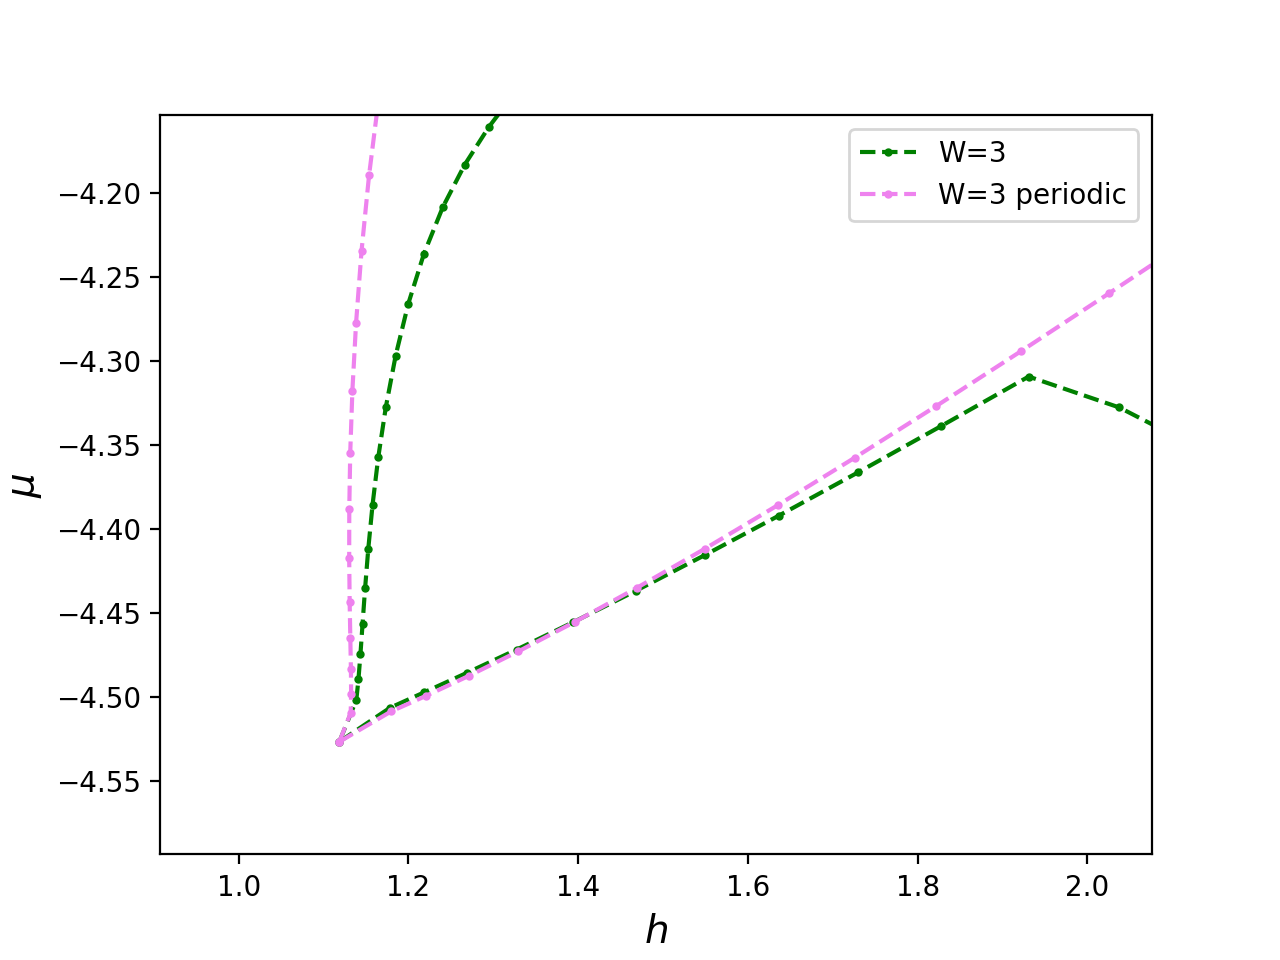

In [99]:
%matplotlib notebook
# plt.figure(figsize=(16, 10))
xscale = 9

plt.plot(h_w3_1, mu_w3_1, 'o--', label='W=3', color='green', markersize=2)
plt.plot(h_w3_2, mu_w3_2, 'o--', color='green', markersize=2)

plt.plot(new_h_w3_toblerone1, new_mu_w3_toblerone1, 
         'o--', label='W=3 periodic', color='violet', markersize=2)
plt.plot(new_h_w3_toblerone2, new_mu_w3_toblerone2,
         'o--', color='violet', markersize=2)
plt.xlabel('$h$', size=14)
plt.ylabel('$\mu$', size=14)

plt.legend()

# W4 / W4 periodic

In [100]:
lst = []
import re
with open("W4_periodic_energies.txt") as f:
    for line in f:
        my_dict = {
                   'E': float(re.search(r"(?<=E = )[\w\+-\.]+",line).group()[:]),
                   'Ndown_total': float(re.search(r"(?<=Ndown= )[\d\+-\.}]+",line).group()[:] or 0),
                   'Nup_total':  float(re.search(r"(?<=Nup= )[\w\+-\.}]+",line).group()[:] or 0)}
        lst.append(my_dict)

In [101]:
w4_period = pd.DataFrame(lst)

In [102]:
w4_period.head()

,E,Ndown_total,Nup_total
0,-3.99413,0.0,1.0
1,-9.52090,1.0,1.0
2,-7.97069,0.0,2.0
3,-13.50850,1.0,2.0
4,-11.91810,0.0,3.0


In [103]:
e11_w4_periodic = w4_period[(w4_period['Nup_total']==1) & (w4_period['Ndown_total']==1)]['E'].values[0]
e10_w4_periodic = w4_period[(w4_period['Nup_total']==1) & (w4_period['Ndown_total']==0)]['E'].values[0]

# Пересечение 

h_w_4_periodic = e10_w4_periodic - e11_w4_periodic/2
mu_w_4_periodic = e11_w4_periodic/2

In [104]:
l = list(range(3,11))

In [105]:
mu_w4_1_periodic, h_w4_1_periodic = [mu_w_4_periodic], [h_w_4_periodic]
for i in l:
    mu = (w4_period[(w4_period['Nup_total']==i+1) & (w4_period['Ndown_total']==1)]['E'].values[0] - w4_period[(w4_period['Nup_total']==i) & (w4_period['Ndown_total']==0)]['E'].values[0])/2
    h = (w4_period[(w4_period['Nup_total']==i-1) & (w4_period['Ndown_total']==1)]['E'].values[0] - w4_period[(w4_period['Nup_total']==i) & (w4_period['Ndown_total']==0)]['E'].values[0])/-2
    mu_w4_1_periodic.append(mu)
    h_w4_1_periodic.append(h)

In [106]:
df2_list = list(range(3,14))

In [107]:
mu_w4_2_periodic, h_w4_2_periodic = [mu_w_4_periodic], [h_w_4_periodic]
for i in df2_list:
    mu = (w4_period[(w4_period['Nup_total']==i+1) & (w4_period['Ndown_total']==i+1)]['E'].values[0] - w4_period[(w4_period['Nup_total']==i) & (w4_period['Ndown_total']==i)]['E'].values[0])/2
    h = (w4_period[(w4_period['Nup_total']==i+1) & (w4_period['Ndown_total']==i-1)]['E'].values[0] - w4_period[(w4_period['Nup_total']==i) & (w4_period['Ndown_total']==i)]['E'].values[0])/2
    mu_w4_2_periodic.append(mu)
    h_w4_2_periodic.append(h)

<IPython.core.display.Javascript object>


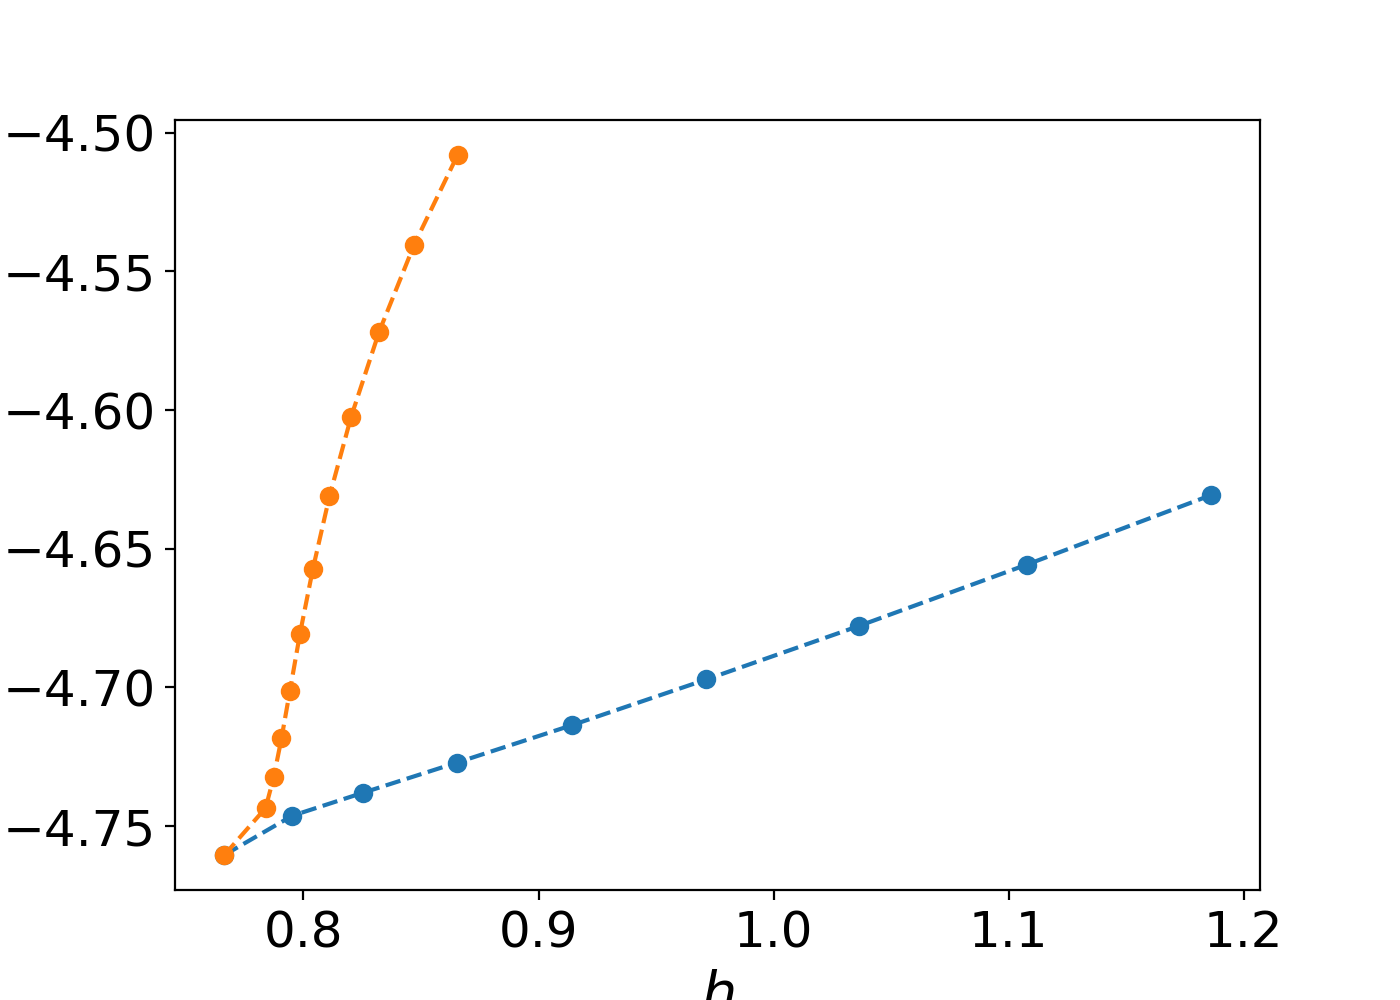

In [108]:
%matplotlib notebook
plt.figure(figsize=(7, 5))

plt.plot(h_w4_1_periodic, mu_w4_1_periodic, 'o--', label='$PP-{FP_1}$')
plt.plot(h_w4_2_periodic, mu_w4_2_periodic, 'o--', label='$ED-PP$')
plt.xlabel('$h$', size=20)
plt.ylabel('$\mu$', size=20)
# plt.axis([0, xscale, -4.7, -3.5])
plt.tick_params(axis='both', which='major', labelsize=18)

In [109]:
delta_mu_w4 = mu_w_4 - mu_w_4_periodic
delta_h_w4 = h_w_4 - h_w_4_periodic

In [110]:
new_h_w4_1 = [i+delta_h_w4 for i in h_w4_1_periodic]
new_h_w4_2 = [i+delta_h_w4 for i in h_w4_2_periodic]

new_mu_w4_1 = [i+delta_mu_w4 for i in mu_w4_1_periodic]
new_mu_w4_2 = [i+delta_mu_w4 for i in mu_w4_2_periodic]

<IPython.core.display.Javascript object>


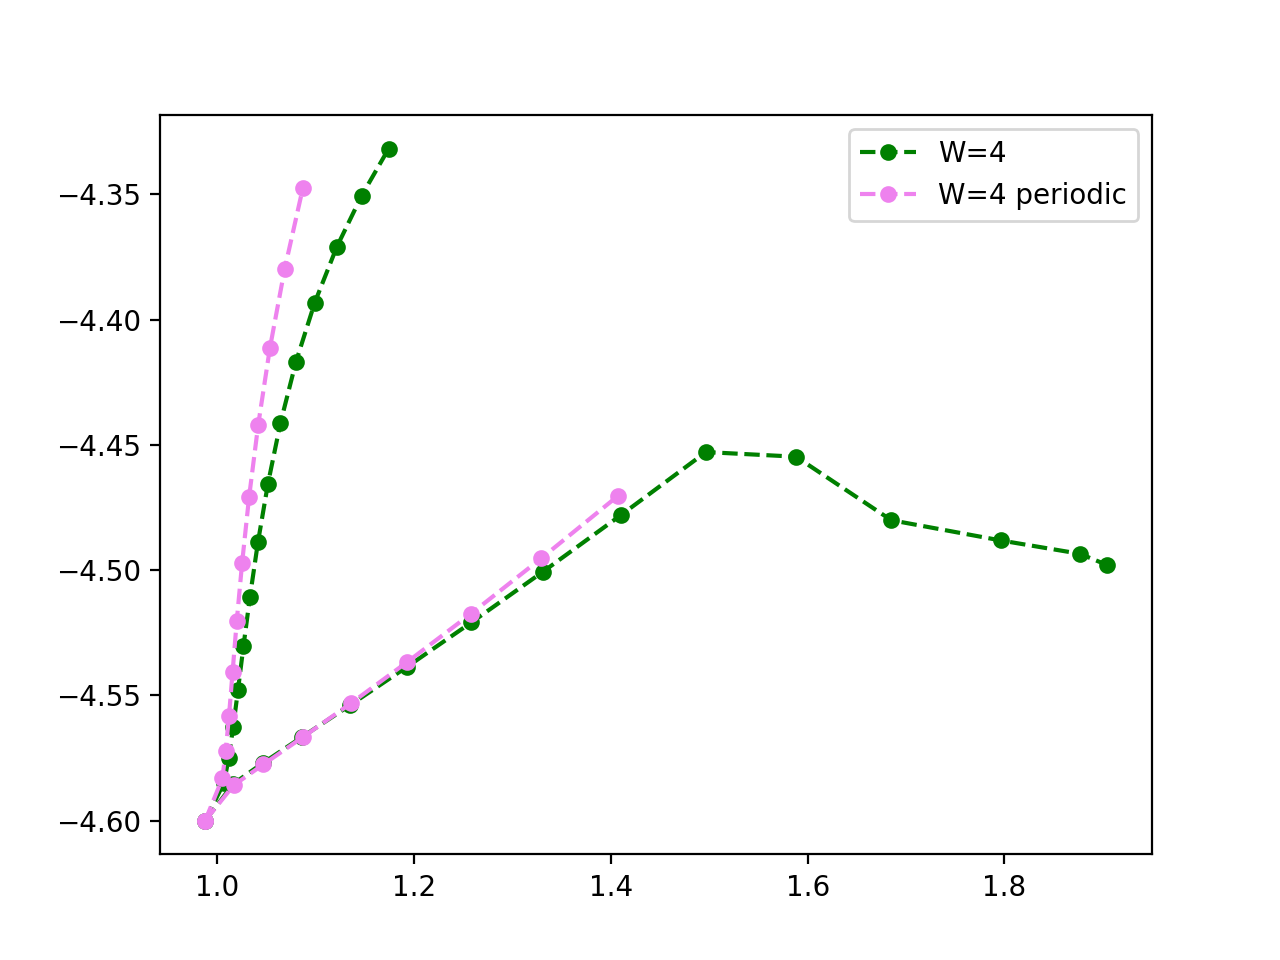

In [111]:
%matplotlib notebook
plt.plot(h_w4_1[:15], mu_w4_1[:15], 'o--', label='W=4', color='green', markersize=5)
plt.plot(h_w4_2[:15], mu_w4_2[:15], 'o--', color='green', markersize=5)
plt.plot(new_h_w4_1, new_mu_w4_1, 'o--', label='W=4 periodic', color='violet', markersize=5)
plt.plot(new_h_w4_2, new_mu_w4_2, 'o--', color='violet', markersize=5)
plt.legend()

# Изменение $t_{\perp}$

# W = 4, $t_{\perp} = 0.1$


**Пересечения нет**

In [121]:
import re
import matplotlib.pyplot as plt
lst = []
with open("ian-W4-01.txt") as f:
    for line in f.readlines():
        my_dict = {'truncation_error': float(re.search(r"(?<='truncation_error': )[\w\+-\.}]+",line).group()[:-1]),
                   'E': float(re.search(r"(?<='E': )[\w\+-\.]+",line).group()[:-1]),
                   'Ndown_total': float(re.search(r"(?<='Ndown_total': )[\w\+-\.}]+",line).group()[:-1]),
                   'Nup_total': float(re.search(r"(?<='Nup_total': )[\w\+-\.}]+",line).group()[:-1])}
        lst.append(my_dict)

In [122]:
import pandas as pd
df = pd.DataFrame(lst)

In [123]:
df_list = [1]+list(range(5,36,5))+[50, 60, 70, 75]

In [124]:
mu_l, h_l = [], []
for i in df_list:
#     print(i)
    mu = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i+1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0])/2
    h = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i-1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0])/2
    mu_l.append(mu)
    h_l.append(h)

<IPython.core.display.Javascript object>


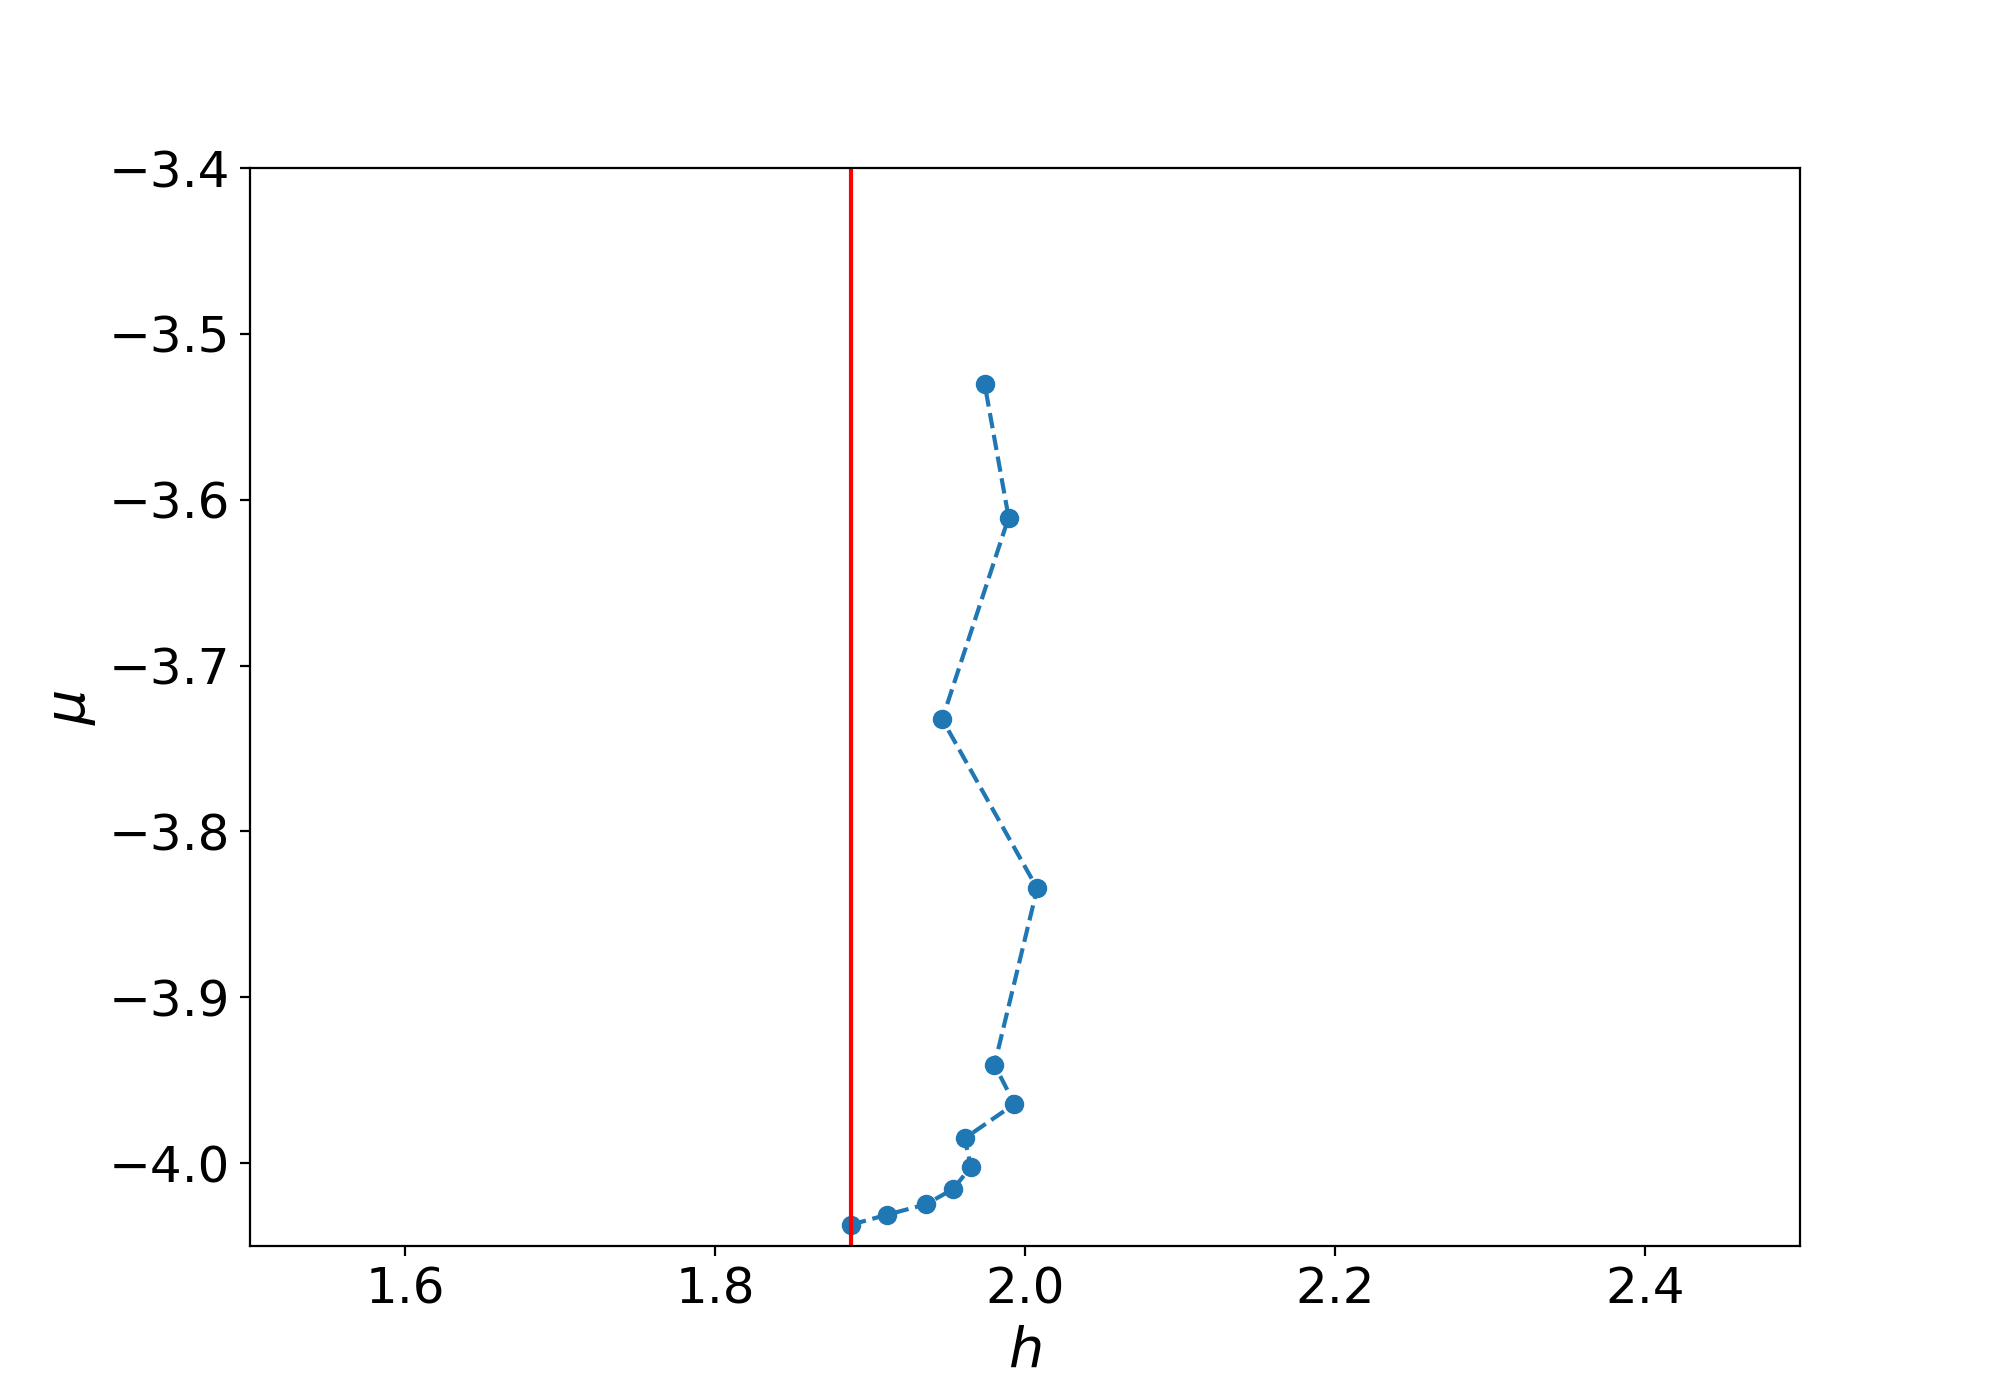

In [125]:
%matplotlib notebook
plt.figure(figsize=(10, 7))

plt.plot( h_l,mu_l, 'o--', label='$ED-PP$')
plt.xlabel('$h$', size=20)
plt.ylabel('$\mu$', size=20)
plt.axis([1.5, 2.5, -4.05, -3.4])
plt.axvline(x=h_l[0], color = 'red')
plt.tick_params(axis='both', which='major', labelsize=18)

# W = 3, $t_{\perp} = 0.2$

**Пересечения нет**

In [134]:
# Новое
import json
import re
import matplotlib.pyplot as plt

In [135]:
lst = []
with open("ian-W3-02.txt") as f:
    for line in f.readlines():
        my_dict = {'truncation_error': float(re.search(r"(?<='truncation_error': )[\w\+-\.}]+",line).group()[:-1]),
                   'E': float(re.search(r"(?<='E': )[\w\+-\.]+",line).group()[:-1]),
                   'Ndown_total': float(re.search(r"(?<='Ndown_total': )[\w\+-\.}]+",line).group()[:-1]),
                   'Nup_total': float(re.search(r"(?<='Nup_total': )[\w\+-\.}]+",line).group()[:-1])}
        lst.append(my_dict)




In [136]:
import pandas as pd
df = pd.DataFrame(lst)
# df.sort_values(by='Nup_total')

In [137]:
# df.sort_values(by='Nup_total')

In [138]:
df_list = list(range(1,62,5))

In [139]:
mu_l, h_l = [], []
for i in df_list:
    mu = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i+1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0])/2
    h = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i-1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0])/2
    mu_l.append(mu)
    h_l.append(h)

<IPython.core.display.Javascript object>


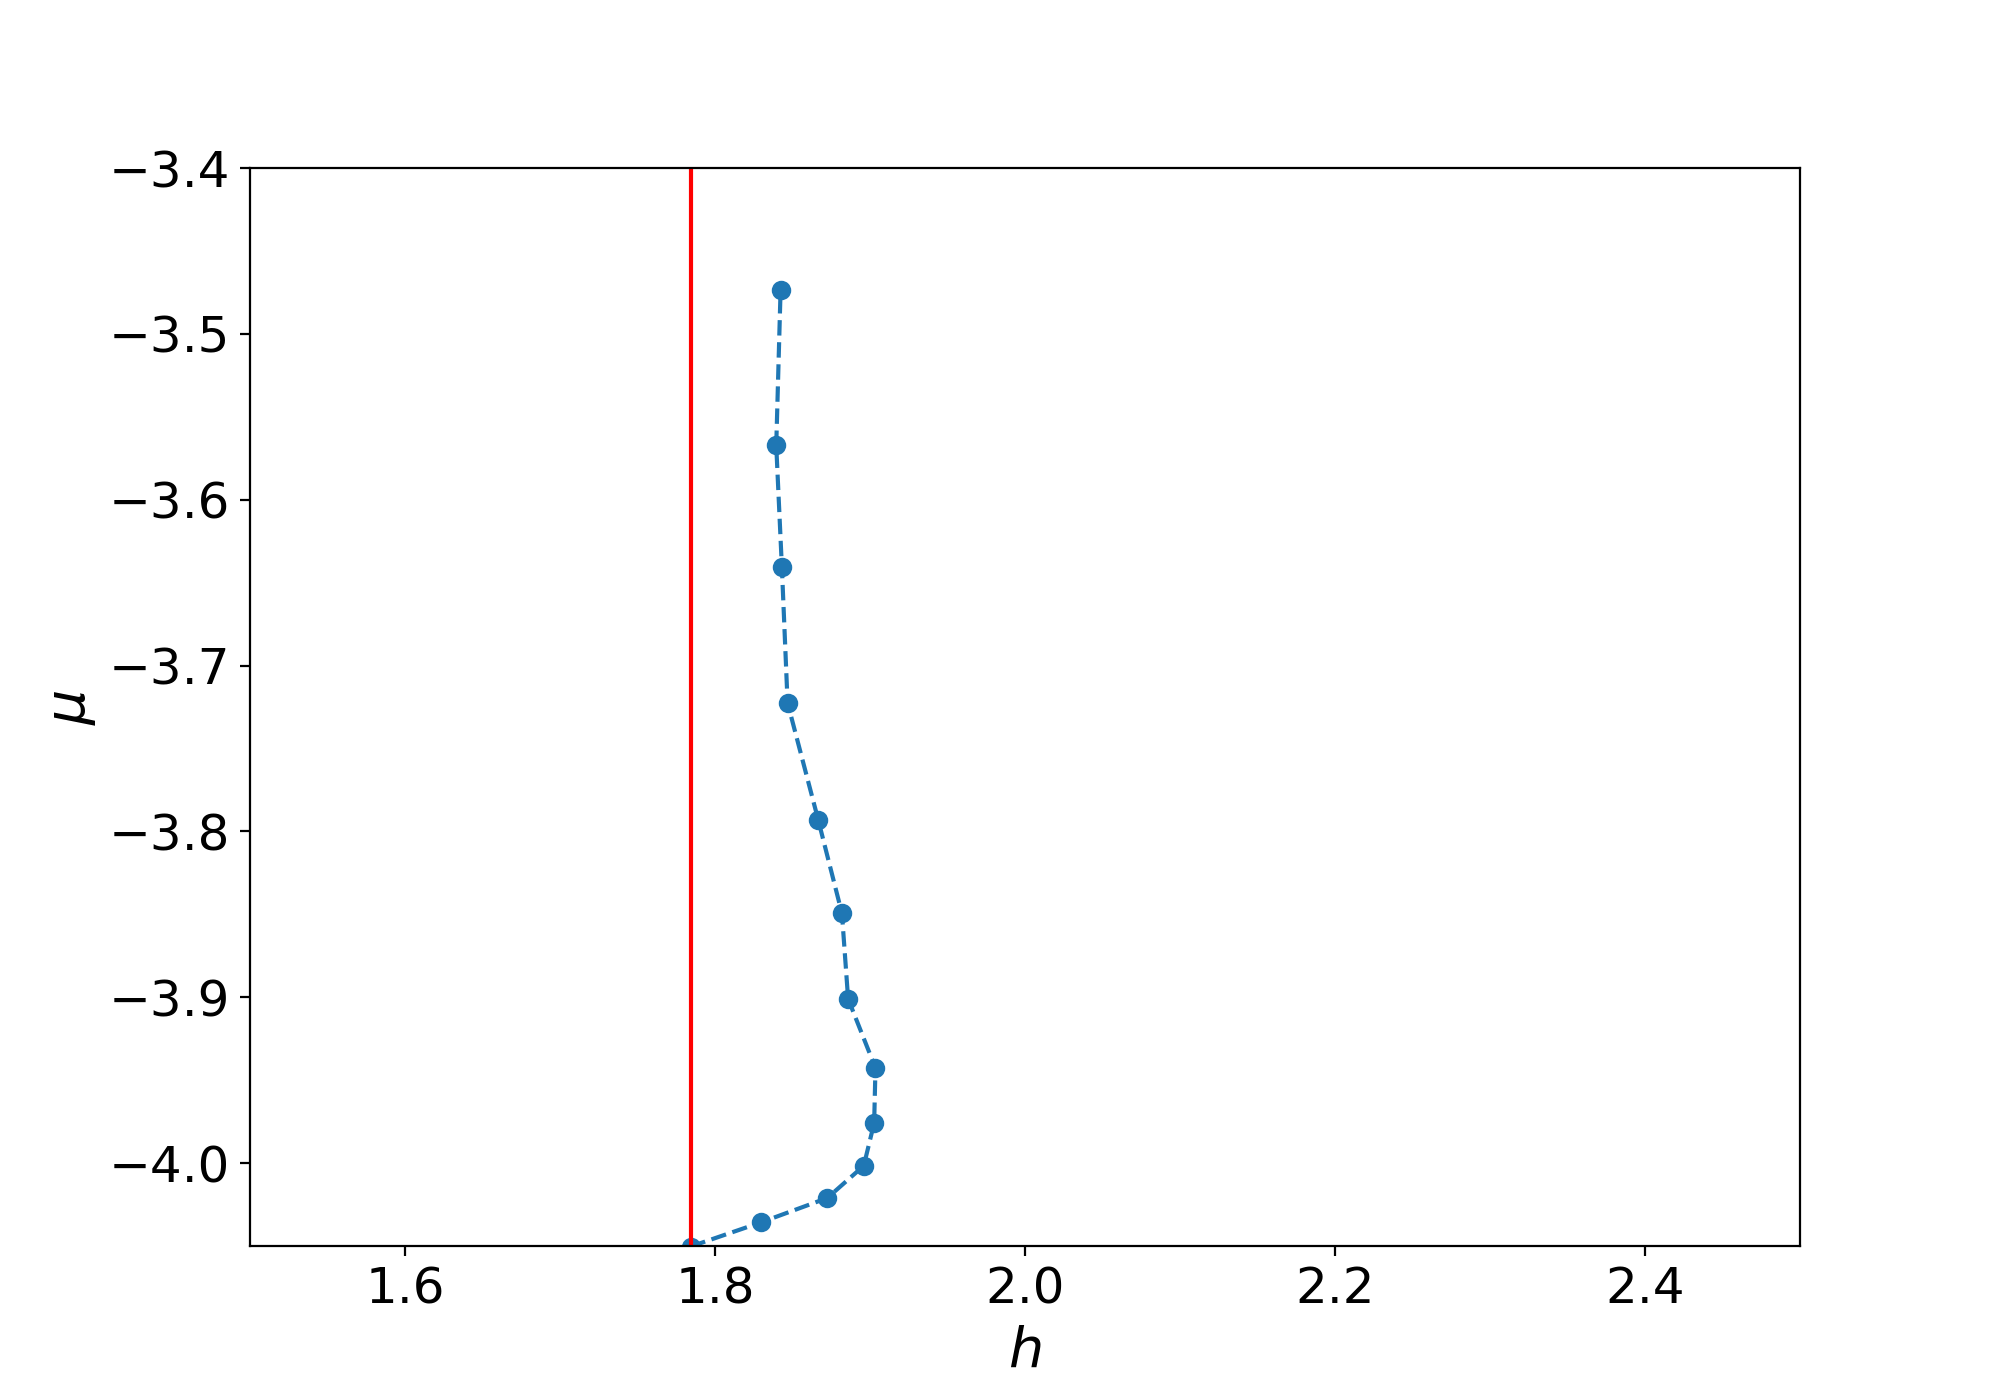

In [140]:
plt.figure(figsize=(10, 7))
# xscale = 8

plt.plot( h_l,mu_l, 'o--', label='$ED-PP$')
plt.xlabel('$h$', size=20)
plt.ylabel('$\mu$', size=20)
plt.axis([1.5, 2.5, -4.05, -3.4])
plt.axvline(x=h_l[0], color = 'red')
plt.tick_params(axis='both', which='major', labelsize=18)

# W = 3, $t_{\perp} = 0.1$

In [141]:
df = pd.read_excel('ian-W3-01.xlsx')

In [142]:
df_list = list(range(1,59))

In [143]:
mu_l, h_l = [], []
for i in df_list:
    mu = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i+1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0])/2
    h = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i-1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0])/2
    mu_l.append(mu)
    h_l.append(h)

<IPython.core.display.Javascript object>


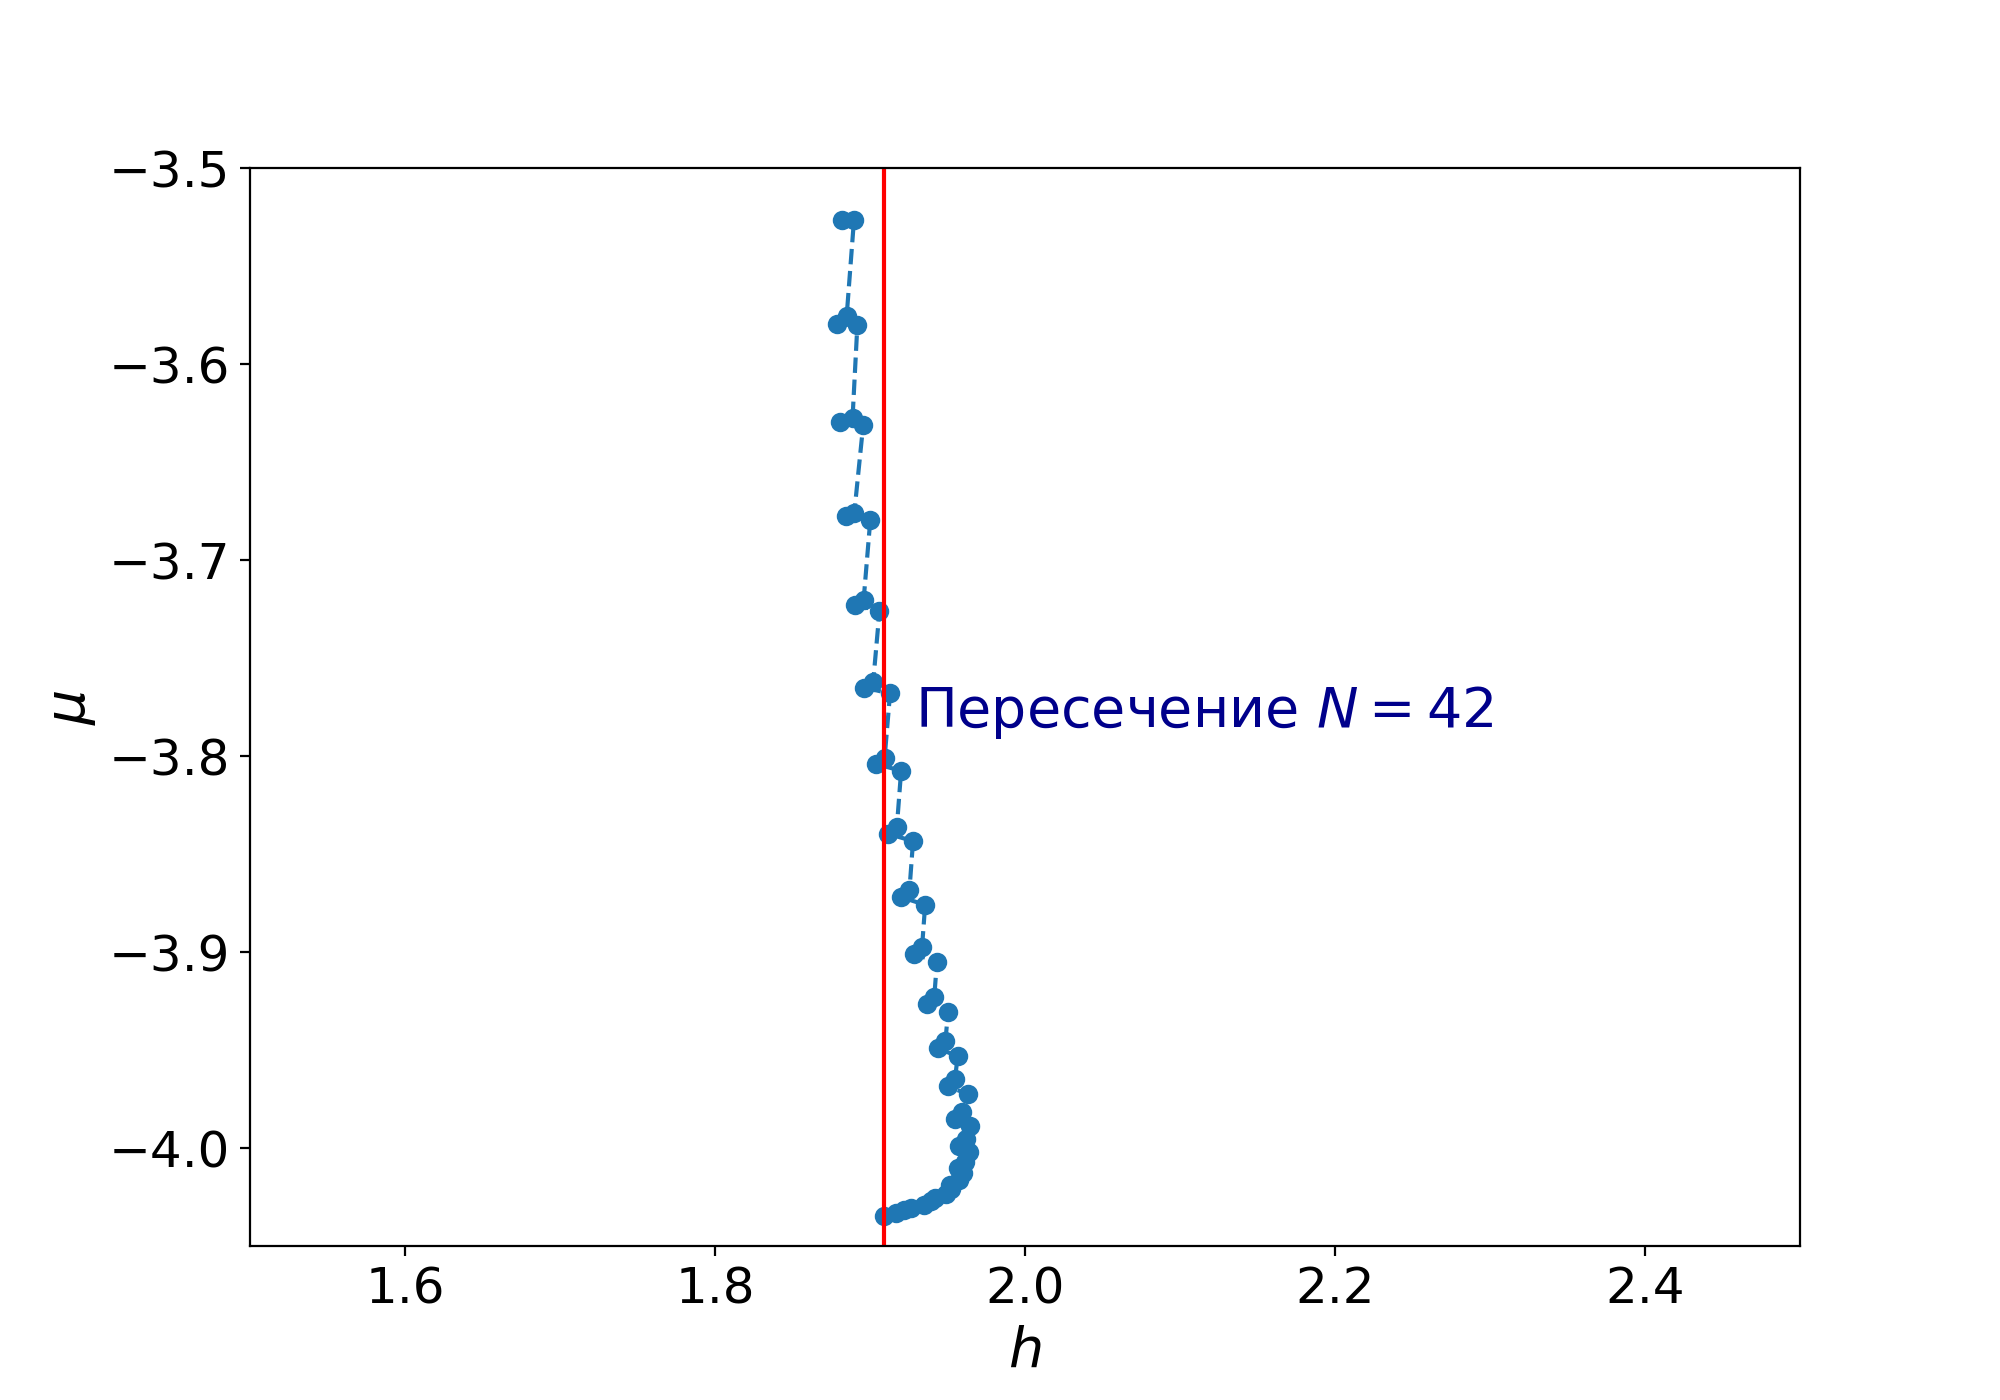

Text(1.9290126037155715, -3.785075398379082, 'Пересечение $N = 42$')

In [144]:
plt.figure(figsize=(10, 7))
xscale = 8

plt.plot( h_l,mu_l, 'o--', label='$ED-PP$')
plt.xlabel('$h$', size=20)
plt.ylabel('$\mu$', size=20)
plt.axis([1.5, 2.5, -4.05, -3.5])
plt.axvline(x=h_l[0], color = 'red')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.text(h_l[0]+0.02, mu_l[42]-0.02, 'Пересечение $N = 42$', fontsize=20, color='darkblue')

# W = 3, $t_{\perp} = 0.05$

In [148]:
lst = []
with open("ian-W3-005.txt") as f:
    for line in f.readlines():
        my_dict = {'truncation_error': float(re.search(r"(?<='truncation_error': )[\w\+-\.}]+",line).group()[:-1]),
                   'E': float(re.search(r"(?<='E': )[\w\+-\.]+",line).group()[:-1]),
                   'Ndown_total': float(re.search(r"(?<='Ndown_total': )[\w\+-\.}]+",line).group()[:-1]),
                   'Nup_total': float(re.search(r"(?<='Nup_total': )[\w\+-\.}]+",line).group()[:-1])}
        lst.append(my_dict)



In [149]:
import pandas as pd
df = pd.DataFrame(lst)

In [150]:
df_list = list(range(1,59))

In [151]:
mu_l, h_l = [], []
for i in df_list:
    mu = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i+1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0])/2
    h = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==i-1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==i)]['E'].values[0])/2
    mu_l.append(mu)
    h_l.append(h)

<IPython.core.display.Javascript object>


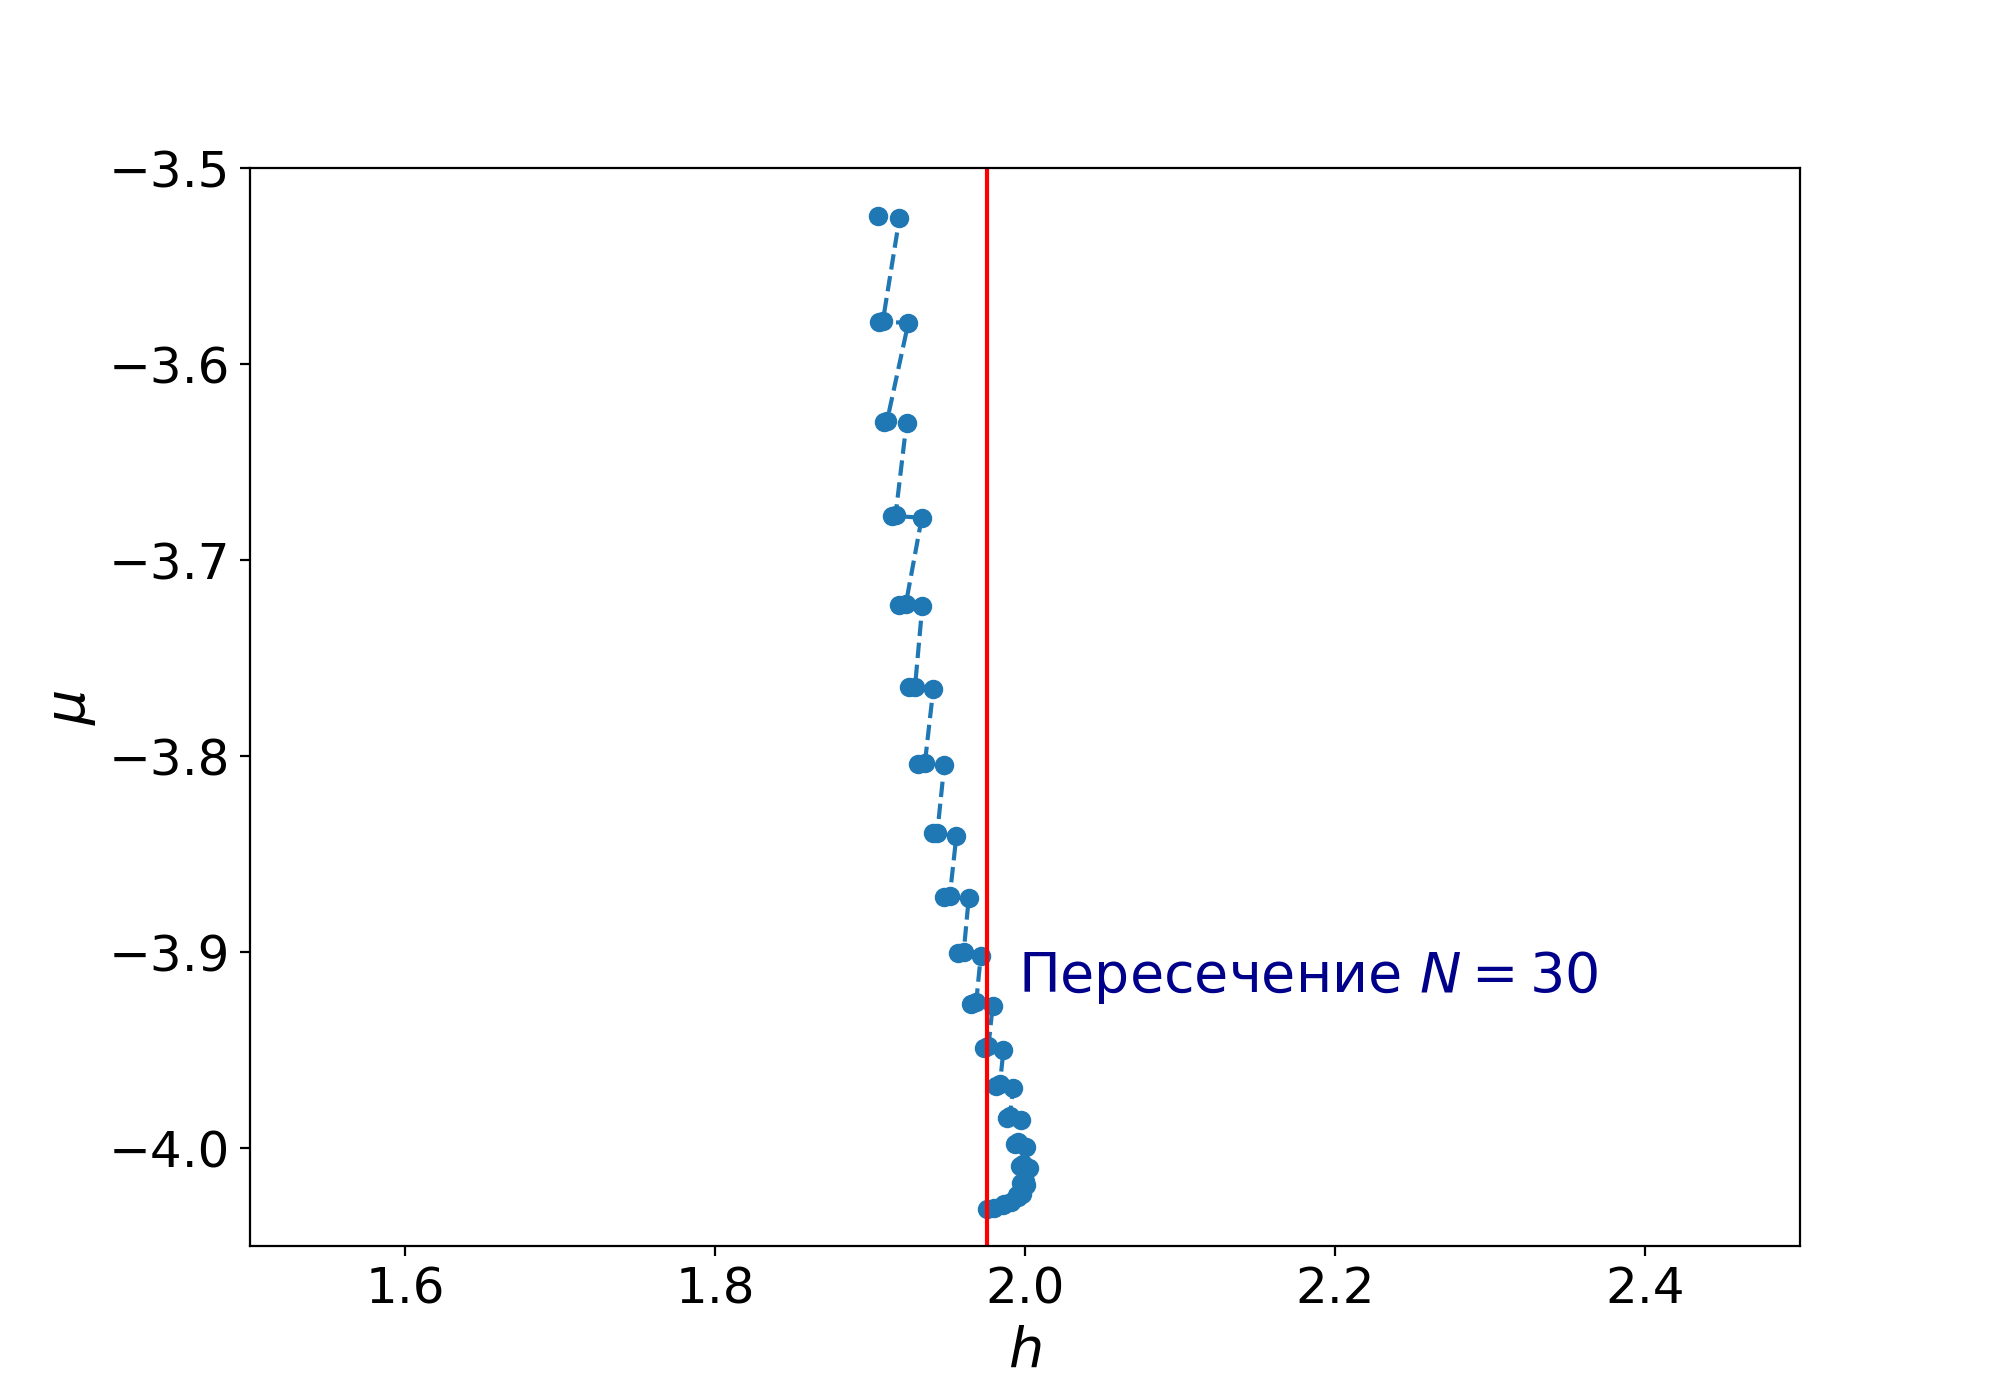

Text(1.9952904950380734, -3.9206443894284644, 'Пересечение $N = 30$')

In [153]:
plt.figure(figsize=(10, 7))
xscale = 8

plt.plot( h_l,mu_l, 'o--', label='$ED-PP$')
plt.xlabel('$h$', size=20)
plt.ylabel('$\mu$', size=20)
plt.axis([1.5, 2.5, -4.05, -3.5])
plt.axvline(x=h_l[0], color = 'red')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.text(h_l[0]+0.02, mu_l[30]-0.02, 'Пересечение $N = 30$', fontsize=20, color='darkblue')